In [80]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [59]:
df=pd.read_csv('Customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

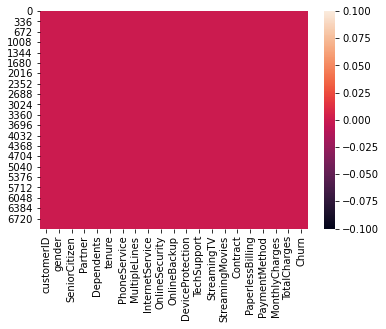

In [5]:
sn.heatmap(df.isnull())

There is no null Value

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [60]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [61]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [62]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [63]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Visualization 

Male      3555
Female    3488
Name: gender, dtype: int64


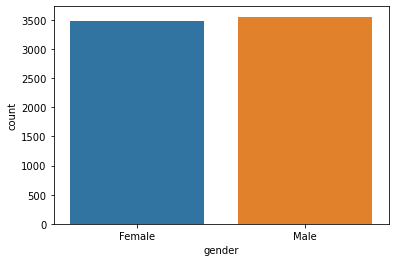

In [16]:
ax = sn.countplot(x="gender", data=df)
print(df["gender"].value_counts())

Total number of male is 3555 and total number of female customer is 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


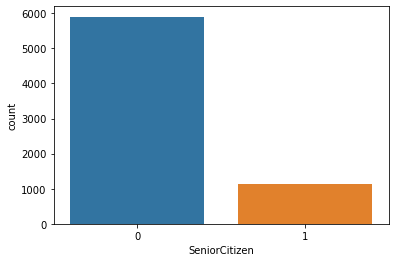

In [17]:
ax = sn.countplot(x="SeniorCitizen", data=df)
print(df["SeniorCitizen"].value_counts())

Total number of younger customer is 5901 and total number of senior citizen customer is 1142.

No     3641
Yes    3402
Name: Partner, dtype: int64


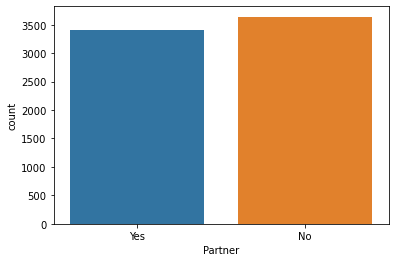

In [18]:
ax = sn.countplot(x="Partner", data=df)
print(df["Partner"].value_counts())

Total number of married customer is 3402 and total number of unmarried customer is 3641.

No     4933
Yes    2110
Name: Dependents, dtype: int64


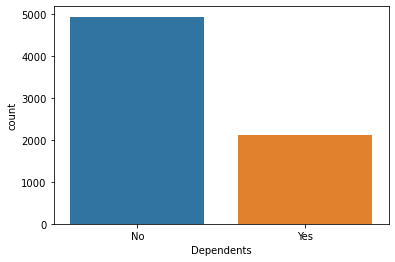

In [19]:
ax = sn.countplot(x="Dependents", data=df)
print(df["Dependents"].value_counts())

Total number of dependent customer is 2110 and total number of independent customer is 4933.

Yes    6361
No      682
Name: PhoneService, dtype: int64


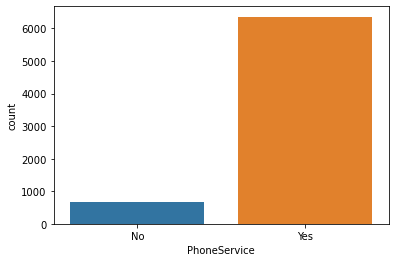

In [20]:
ax = sn.countplot(x="PhoneService", data=df)
print(df["PhoneService"].value_counts())

Total number of customer using phone services is 6361 and total number of customer not using phone services is 682.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


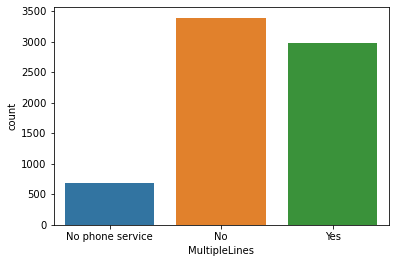

In [21]:
ax = sn.countplot(x="MultipleLines", data=df)
print(df["MultipleLines"].value_counts())

 Total number of customer not using any phone services is 682, using no mutiple services is 3390 and using multiple services is 2971.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


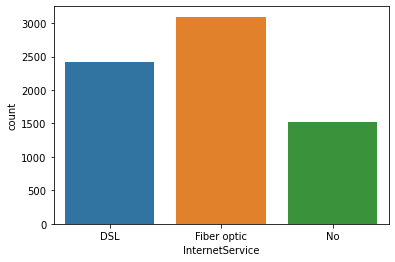

In [22]:
ax = sn.countplot(x="InternetService", data=df)
print(df["InternetService"].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


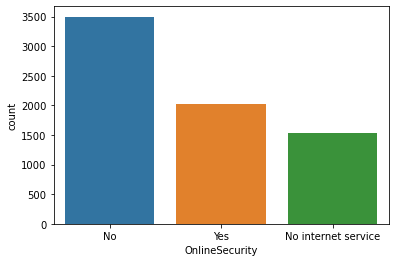

In [24]:
ax = sn.countplot(x="OnlineSecurity", data=df)
print(df["OnlineSecurity"].value_counts())

total number of customer not using any internet services is 1526, using online security is 2019 and not using online security services is 3498.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


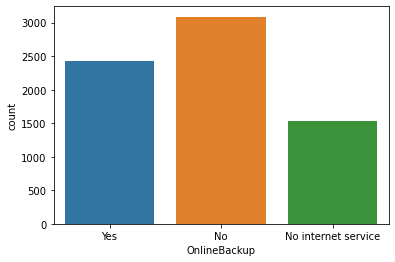

In [25]:
ax = sn.countplot(x="OnlineBackup", data=df)
print(df["OnlineBackup"].value_counts())

total number of customer not using any internet services is 1526, using online security is 2019 and not using online security services is 3498.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


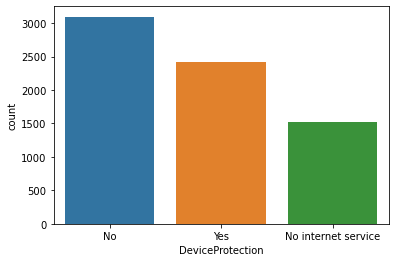

In [26]:
ax = sn.countplot(x="DeviceProtection", data=df)
print(df["DeviceProtection"].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


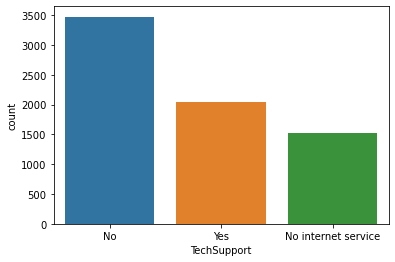

In [27]:
ax = sn.countplot(x="TechSupport", data=df)
print(df["TechSupport"].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


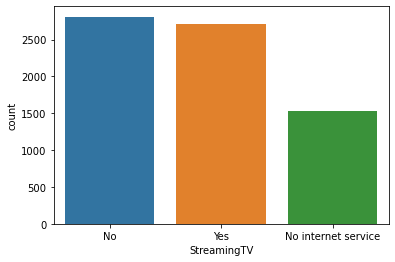

In [28]:
ax = sn.countplot(x="StreamingTV", data=df)
print(df["StreamingTV"].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


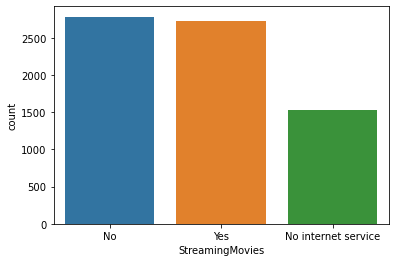

In [29]:
ax = sn.countplot(x="StreamingMovies", data=df)
print(df["StreamingMovies"].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


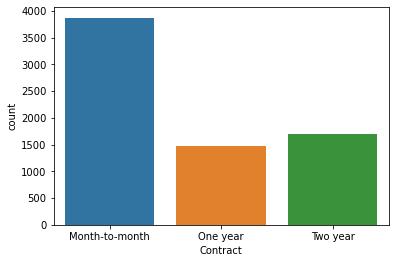

In [30]:
ax = sn.countplot(x="Contract", data=df)
print(df["Contract"].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


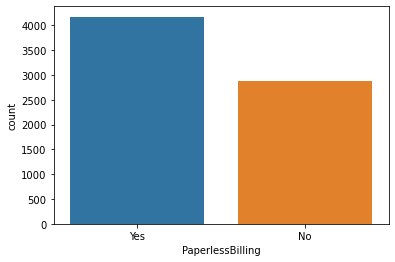

In [31]:
ax = sn.countplot(x="PaperlessBilling", data=df)
print(df["PaperlessBilling"].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


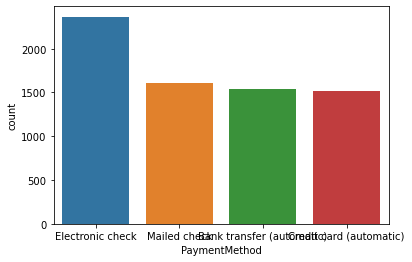

In [32]:
ax = sn.countplot(x="PaymentMethod", data=df)
print(df["PaymentMethod"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


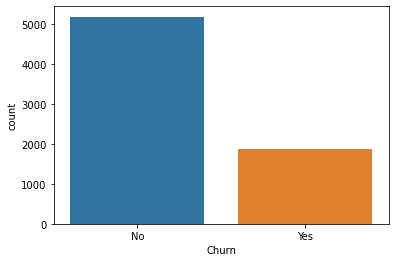

In [33]:
ax = sn.countplot(x="Churn", data=df)
print(df["Churn"].value_counts())

In [ ]:
total number of customer churn yes 5174 and no is 1869.

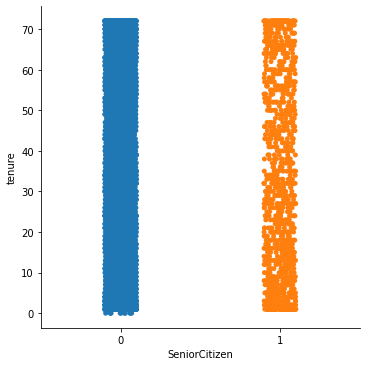

In [34]:
sn.catplot(x="SeniorCitizen", y="tenure", data=df)

C:\Users\rupam\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

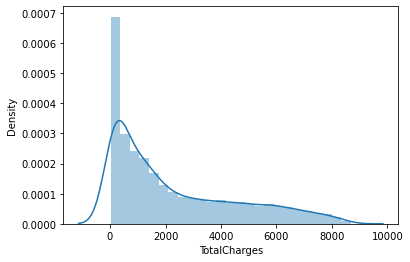

In [36]:
sn.distplot(df['TotalCharges'], kde=True)

C:\Users\rupam\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

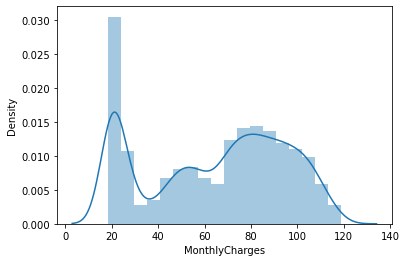

In [37]:
sn.distplot(df['MonthlyCharges'], kde=True)

# Encoding Data

In [64]:
from sklearn.preprocessing import OrdinalEncoder
en=OrdinalEncoder()

In [65]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

In [66]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [41]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [42]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

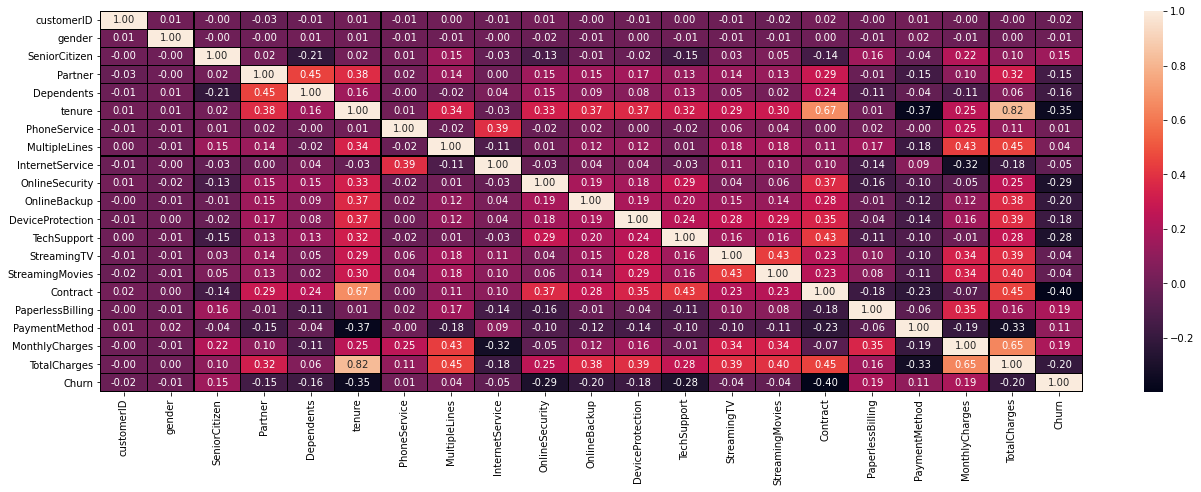

In [44]:
plt.figure(figsize=(22,7))
sn.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

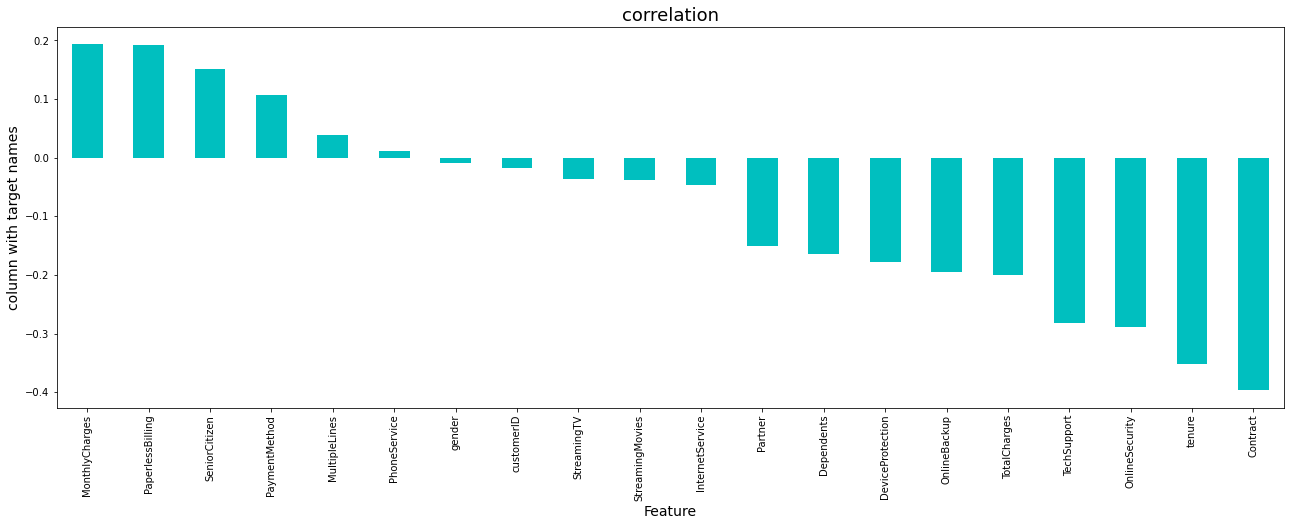

In [45]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [46]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

# Outlier Checking

<AxesSubplot:>

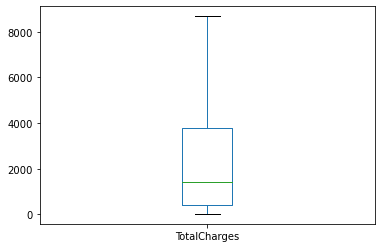

In [47]:
df["TotalCharges"].plot.box()

<AxesSubplot:>

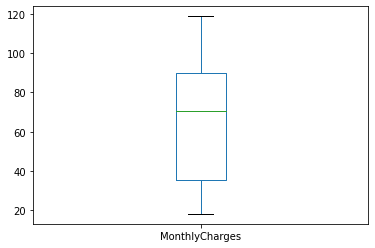

In [48]:
df["MonthlyCharges"].plot.box()

<AxesSubplot:>

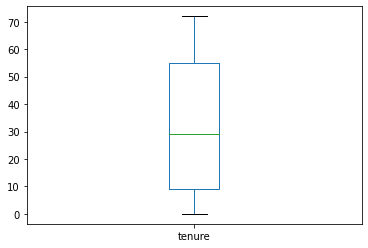

In [49]:
df["tenure"].plot.box()

# Treating Outlier

In [67]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [68]:
df1=df[(z<3).all(axis=1)]
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [52]:
Data_loss=((7043-6361)/7043)*100

In [53]:
Data_loss

9.683373562402386

In [69]:
x=df1.iloc[:,0:-1]
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40


In [70]:
y=df1.iloc[:,-1]
y.head()

1    0.0
2    1.0
4    1.0
5    1.0
6    0.0
Name: Churn, dtype: float64

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [73]:
x.value_counts()

customerID   gender    SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0.000000     0.000000  0              1.0      1.000000    9       1.0           0.000000       0.0              0.0             2.000000      0.0               2.0          2.000000     0.000000         1.000000  1.000000          3.000000       65.600000       593.300000      1
4626.827020  1.000000  0              0.0      0.989189    1       1.0           1.978377       1.0              0.0             0.000000      0.0               0.0          1.978377     1.978377         0.000000  1.000000          2.000000       93.043773       93.043773       1
4649.000000  1.000000  0              0.0      0.000000    26      1.0           0.000000       1.0              0.0             0.000000      2.0               2

In [74]:
y.value_counts()

0.0    4662
1.0    4662
Name: Churn, dtype: int64

# Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.2289272 ,  1.0509584 , -0.39383253, ...,  1.39607072,
        -0.50069872, -0.10310913],
       [-0.46238842,  1.0509584 , -0.39383253, ...,  1.39607072,
        -0.61174545, -0.9012268 ],
       [ 1.48941611, -1.05904469, -0.39383253, ...,  0.37259695,
        -0.00815276, -0.88173702],
       ...,
       [-1.48532857, -1.05904469, -0.39383253, ...,  0.37259695,
         0.18555493, -0.91558312],
       [-0.17777696,  0.31250775, -0.39383253, ..., -0.34378576,
        -0.0416458 , -0.91842485],
       [ 1.09467773, -1.05904469, -0.39383253, ...,  0.37259695,
         0.59173626,  0.06145497]])

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [81]:
lg=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.7809357822764446
At random state 0,the testing accuracy is:- 0.7801608579088471


At random state 1,the training accuracy is:- 0.7852259015953881
At random state 1,the testing accuracy is:- 0.7699731903485255


At random state 2,the training accuracy is:- 0.78603029896769
At random state 2,the testing accuracy is:- 0.7721179624664879


At random state 3,the training accuracy is:- 0.7797291862179917
At random state 3,the testing accuracy is:- 0.7957104557640751


At random state 4,the training accuracy is:- 0.7824105107923314
At random state 4,the testing accuracy is:- 0.7801608579088471


At random state 5,the training accuracy is:- 0.7799973186754257
At random state 5,the testing accuracy is:- 0.7849865951742627


At random state 6,the training accuracy is:- 0.7854940340528221
At random state 6,the testing accuracy is:- 0.7619302949061663


At random state 7,the training accuracy is:- 0.7787907226169728
At random state 7,the testing accur

At random state 72,the testing accuracy is:- 0.7801608579088471


At random state 73,the training accuracy is:- 0.7812039147338785
At random state 73,the testing accuracy is:- 0.7855227882037533


At random state 74,the training accuracy is:- 0.7809357822764446
At random state 74,the testing accuracy is:- 0.7737265415549598


At random state 75,the training accuracy is:- 0.7781203914733879
At random state 75,the testing accuracy is:- 0.7908847184986595


At random state 76,the training accuracy is:- 0.7842874379943692
At random state 76,the testing accuracy is:- 0.7705093833780161


At random state 77,the training accuracy is:- 0.7844215042230862
At random state 77,the testing accuracy is:- 0.7769436997319035


At random state 78,the training accuracy is:- 0.7806676498190106
At random state 78,the testing accuracy is:- 0.7849865951742627


At random state 79,the training accuracy is:- 0.777315994101086
At random state 79,the testing accuracy is:- 0.7908847184986595


At random state 80

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=19)

In [84]:
x_train.shape

(6247, 20)

In [85]:
y_train.shape

(6247,)

In [86]:
y_test.shape

(3077,)

In [87]:
x_test.shape

(3077, 20)

In [88]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.785830354241144
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      1540
         1.0       0.77      0.81      0.79      1537

    accuracy                           0.79      3077
   macro avg       0.79      0.79      0.79      3077
weighted avg       0.79      0.79      0.79      3077



In [89]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.818329541761456
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82      1540
         1.0       0.81      0.83      0.82      1537

    accuracy                           0.82      3077
   macro avg       0.82      0.82      0.82      3077
weighted avg       0.82      0.82      0.82      3077



In [90]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.861878453038674
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1540
         1.0       0.88      0.83      0.86      1537

    accuracy                           0.86      3077
   macro avg       0.86      0.86      0.86      3077
weighted avg       0.86      0.86      0.86      3077



In [91]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8404289892752681
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1540
         1.0       0.84      0.83      0.84      1537

    accuracy                           0.84      3077
   macro avg       0.84      0.84      0.84      3077
weighted avg       0.84      0.84      0.84      3077



In [92]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7871303217419564
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76      1540
         1.0       0.74      0.89      0.81      1537

    accuracy                           0.79      3077
   macro avg       0.80      0.79      0.78      3077
weighted avg       0.80      0.79      0.78      3077



# Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.778101865169315


In [95]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.8017037360917743


In [96]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8397789642039374


In [97]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.8213274804680758


In [98]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.7862528046577454


# AUC ROC Curve

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [100]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.99, 0.03, 0.07, ..., 0.48, 0.67, 0.01])

In [101]:
y_pred_prob.shape

(3077,)

In [102]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [103]:
fpr

array([0.00000000e+00, 6.49350649e-04, 6.49350649e-04, 6.49350649e-04,
       6.49350649e-04, 6.49350649e-04, 1.29870130e-03, 1.29870130e-03,
       1.29870130e-03, 1.29870130e-03, 1.94805195e-03, 3.24675325e-03,
       4.54545455e-03, 5.19480519e-03, 5.19480519e-03, 8.44155844e-03,
       1.03896104e-02, 1.03896104e-02, 1.10389610e-02, 1.23376623e-02,
       1.29870130e-02, 1.49350649e-02, 1.68831169e-02, 1.94805195e-02,
       2.01298701e-02, 2.27272727e-02, 2.33766234e-02, 2.59740260e-02,
       2.79220779e-02, 3.05194805e-02, 3.24675325e-02, 3.57142857e-02,
       4.02597403e-02, 4.28571429e-02, 4.74025974e-02, 5.12987013e-02,
       5.45454545e-02, 5.97402597e-02, 6.49350649e-02, 6.75324675e-02,
       7.14285714e-02, 7.33766234e-02, 7.72727273e-02, 8.24675325e-02,
       8.63636364e-02, 9.15584416e-02, 9.54545455e-02, 1.00000000e-01,
       1.02597403e-01, 1.06493506e-01, 1.11038961e-01, 1.15584416e-01,
       1.19480519e-01, 1.24675325e-01, 1.27272727e-01, 1.33116883e-01,
      

In [104]:
tpr

array([0.        , 0.12166558, 0.2192583 , 0.28692258, 0.33506831,
       0.37540664, 0.40468445, 0.43396226, 0.46974626, 0.49121666,
       0.50683149, 0.52635003, 0.54001301, 0.55953155, 0.57124268,
       0.58360442, 0.59206246, 0.60507482, 0.61938842, 0.63565387,
       0.64866623, 0.65517241, 0.66428107, 0.67143787, 0.67664281,
       0.68900455, 0.69355888, 0.70006506, 0.71242681, 0.71893299,
       0.72218608, 0.7267404 , 0.73324658, 0.73845153, 0.74170462,
       0.74756018, 0.75471698, 0.75992193, 0.76707872, 0.77358491,
       0.7807417 , 0.7839948 , 0.78594665, 0.79310345, 0.79830839,
       0.8093689 , 0.81522446, 0.82108003, 0.82628497, 0.83214053,
       0.83474301, 0.83864671, 0.8418998 , 0.84710475, 0.85230969,
       0.86076773, 0.86662329, 0.870527  , 0.87638256, 0.88028627,
       0.88549122, 0.89264802, 0.89655172, 0.90110605, 0.90566038,
       0.91086532, 0.91476903, 0.91932336, 0.92192583, 0.92387768,
       0.92843201, 0.93558881, 0.93754066, 0.94144437, 0.94469

In [105]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])

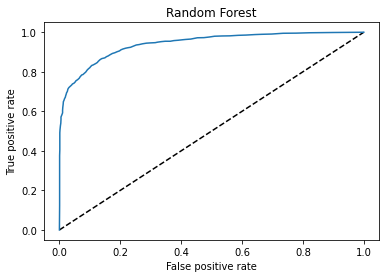

In [106]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest')
plt.show()

In [107]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [108]:
auc_score

0.8618520224083008

# Hyper Parameter Tuning

In [109]:
parameter = {'n_estimators':[100,200, 400, 600, 800, 1000],'max_depth': [10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [3, 4, 5,6],'max_features':['auto', 'sqrt']}

In [ ]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(rf,parameter,cv=5)

In [ ]:
GV.fit(x_train,y_train)

In [ ]:
GV.best_params_

In [110]:
rf=RandomForestClassifier(n_estimators=600,max_depth=30,criterion='gini',min_samples_split=10,min_samples_leaf=5,max_features='auto')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8635034124146896
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1540
         1.0       0.88      0.84      0.86      1537

    accuracy                           0.86      3077
   macro avg       0.86      0.86      0.86      3077
weighted avg       0.86      0.86      0.86      3077



# Saving Model

In [114]:
import pickle
filename = 'Customer_churn.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [115]:
loaded_model = pickle.load(open('Customer_churn.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8635034124146896
